<a href="https://colab.research.google.com/github/Gabryel-Borges/lia1-2023-2/blob/main/Gabryel-Borges/Aula1_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.0 MB/s eta 0:00:00
Mounted at /content/gdrive


In [56]:
#hide
from fastbook import *

In [57]:
urls = search_images_ddg('birds photos', max_images=1)
len(urls),urls[0]

(1,
 'http://wallup.net/wp-content/uploads/2016/01/202352-animals-macaws-nature-closeup-birds-parrot.jpg')

In [68]:
# descomente a linha abaixo para fazer o teste com a imagem de uma floresta
#dest = Path('floresta.jpg')
dest = Path('bird.jpg')
if not dest.exists() : download_url(urls[0], dest, show_progress=False)

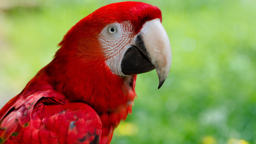

In [69]:
im = Image.open(dest)
im.to_thumb(256,256)

In [63]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

if not path.exists():
  for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

In [64]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

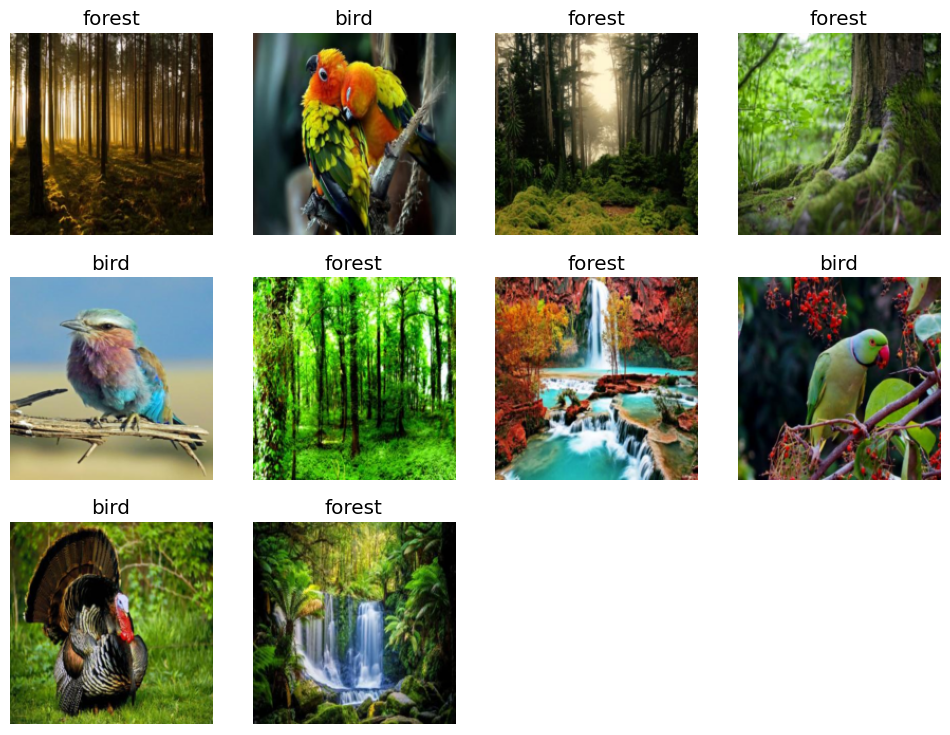

In [65]:
from torch.utils.data import dataloader
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]

).dataloaders(path)

dls.show_batch(max_n=10)

In [66]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.795594,0.867658,0.315789,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.037410,0.021438,0.000000,01:06
1,0.031693,0.000631,0.000000,01:08


In [67]:
# descomente a linha abaixo caso esteja fazendo o teste com a imagem de uma floresta
# is_bird,_,probs = learn.predict(PILImage.create('floresta.jpg'))
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"Isso é um: {is_bird}.")
print(f"Probabilidade de ser um pássaro: {probs[0]:.4f}")

Isso é um: bird.
Probabilidade de ser um pássaro: 0.8622
